In [113]:
import pandas as pd
from sqlalchemy import text
import pyodbc

In [114]:
connection_string = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=HP-Pepijn;'
    'DATABASE=VoetbalDWH;'  # Vervang dit door de naam van je database
    'Trusted_Connection=yes;'
)

connection = pyodbc.connect(connection_string)


In [115]:
query = """
SELECT *
FROM FactMatchen
"""

data = pd.read_sql_query(query, connection)
data.head()

C:\Users\Pepijn\AppData\Local\Temp\ipykernel_9160\882806772.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey
0,0,19600710,2130,30,28,2,1,3
1,1,19600709,1800,29,4,2,0,3
2,2,19600706,2030,29,30,0,3,3
3,3,19600706,2000,4,28,4,5,3
4,4,19600529,1700,29,16,3,0,0


In [116]:
data = data.sort_values(by=['DateKey', 'TimeKey']).reset_index().drop('index', axis=1)
data.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey
0,8,19600327,1700,22,4,2,4,0
1,23,19600405,1700,18,29,2,0,0
2,22,19600426,1700,10,16,2,0,0
3,7,19600508,1700,5,28,2,1,0
4,21,19600510,1700,29,18,4,0,0


In [117]:
def map_uitslag(row):
    scoreThuis = row['ScoreHome']
    scoreUit = row['ScoreAway']

    if scoreThuis > scoreUit:
        return 'Winst'
    elif scoreThuis < scoreUit:
        return 'Verlies'
    else:
        return 'Gelijkspel'

data['UitslagThuis'] = data.apply(map_uitslag, axis=1)
data.head()


,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis
0,8,19600327,1700,22,4,2,4,0,Verlies
1,23,19600405,1700,18,29,2,0,0,Winst
2,22,19600426,1700,10,16,2,0,0,Winst
3,7,19600508,1700,5,28,2,1,0,Winst
4,21,19600510,1700,29,18,4,0,0,Winst


In [118]:
def map_uitslag(row):
    scoreThuis = row['ScoreHome']
    scoreUit = row['ScoreAway']

    if scoreThuis > scoreUit:
        return 'Verlies'
    elif scoreThuis < scoreUit:
        return 'Winst'
    else:
        return 'Gelijkspel'

data['UitslagUit'] = data.apply(map_uitslag, axis=1)
data.head()


,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst
1,23,19600405,1700,18,29,2,0,0,Winst,Verlies
2,22,19600426,1700,10,16,2,0,0,Winst,Verlies
3,7,19600508,1700,5,28,2,1,0,Winst,Verlies
4,21,19600510,1700,29,18,4,0,0,Winst,Verlies


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MactchKey     1663 non-null   int64 
 1   DateKey       1663 non-null   int64 
 2   TimeKey       1663 non-null   int64 
 3   HomeTeamKey   1663 non-null   int64 
 4   AwayTeamKey   1663 non-null   int64 
 5   ScoreHome     1663 non-null   int64 
 6   ScoreAway     1663 non-null   int64 
 7   TypeKey       1663 non-null   int64 
 8   UitslagThuis  1663 non-null   object
 9   UitslagUit    1663 non-null   object
dtypes: int64(8), object(2)
memory usage: 130.1+ KB


In [120]:
def map_uitslag(row):
    scoreThuis = row['ScoreHome']
    scoreUit = row['ScoreAway']

    if scoreThuis > scoreUit:
        return 0
    elif scoreThuis < scoreUit:
        return 1
    else:
        return 2

data['Uitslag'] = data.apply(map_uitslag, axis=1)
data.head()


,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,Uitslag
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1
1,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0
2,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0
3,7,19600508,1700,5,28,2,1,0,Winst,Verlies,0
4,21,19600510,1700,29,18,4,0,0,Winst,Verlies,0


In [121]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,Uitslag
MactchKey,1.000000,0.996878,0.079801,0.226291,0.256862,-0.087106,0.066808,0.061467,0.019322
DateKey,0.996878,1.000000,0.081485,0.208293,0.242950,-0.092218,0.062519,0.089059,0.019515
TimeKey,0.079801,0.081485,1.000000,-0.174426,-0.109020,-0.011414,-0.030176,0.200229,-0.024669
HomeTeamKey,0.226291,0.208293,-0.174426,1.000000,0.112527,-0.221719,0.266959,-0.200404,0.147018
AwayTeamKey,0.256862,0.242950,-0.109020,0.112527,1.000000,0.211286,-0.124226,-0.182177,-0.172976
ScoreHome,-0.087106,-0.092218,-0.011414,-0.221719,0.211286,1.000000,-0.225880,-0.074308,-0.542839
ScoreAway,0.066808,0.062519,-0.030176,0.266959,-0.124226,-0.225880,1.000000,0.048050,0.289229
TypeKey,0.061467,0.089059,0.200229,-0.200404,-0.182177,-0.074308,0.048050,1.000000,0.010079
Uitslag,0.019322,0.019515,-0.024669,0.147018,-0.172976,-0.542839,0.289229,0.010079,1.000000


array([[<Axes: xlabel='MactchKey', ylabel='MactchKey'>,
        <Axes: xlabel='DateKey', ylabel='MactchKey'>,
        <Axes: xlabel='TimeKey', ylabel='MactchKey'>,
        <Axes: xlabel='HomeTeamKey', ylabel='MactchKey'>,
        <Axes: xlabel='AwayTeamKey', ylabel='MactchKey'>,
        <Axes: xlabel='ScoreHome', ylabel='MactchKey'>,
        <Axes: xlabel='ScoreAway', ylabel='MactchKey'>,
        <Axes: xlabel='TypeKey', ylabel='MactchKey'>,
        <Axes: xlabel='Uitslag', ylabel='MactchKey'>],
       [<Axes: xlabel='MactchKey', ylabel='DateKey'>,
        <Axes: xlabel='DateKey', ylabel='DateKey'>,
        <Axes: xlabel='TimeKey', ylabel='DateKey'>,
        <Axes: xlabel='HomeTeamKey', ylabel='DateKey'>,
        <Axes: xlabel='AwayTeamKey', ylabel='DateKey'>,
        <Axes: xlabel='ScoreHome', ylabel='DateKey'>,
        <Axes: xlabel='ScoreAway', ylabel='DateKey'>,
        <Axes: xlabel='TypeKey', ylabel='DateKey'>,
        <Axes: xlabel='Uitslag', ylabel='DateKey'>],
       [<Axes: x

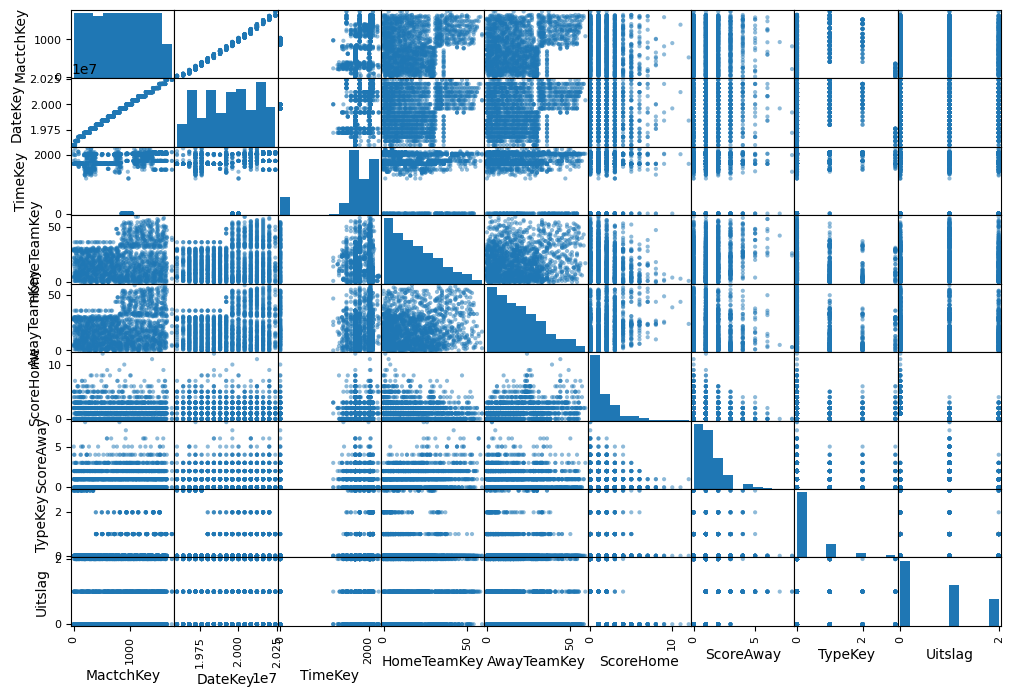

In [122]:
from pandas.plotting import scatter_matrix

attributes = ["MactchKey", "DateKey", "TimeKey", "HomeTeamKey", "AwayTeamKey", "ScoreHome", "ScoreAway", "TypeKey", "Uitslag"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [123]:
dubbleData = pd.concat([data, data], ignore_index=True)
dubbleData = dubbleData.sort_values(by=['DateKey', 'TimeKey']).reset_index().drop('index', axis=1)
dubbleData.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,Uitslag
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1
1,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1
2,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0
3,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0
4,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0


In [124]:
def map_key(index, row):
    if index % 2 == 0:
        return row['HomeTeamKey']
    else:
        return row['AwayTeamKey']

# Toepassen van de functie op elke rij
dubbleData['keyTeam'] = dubbleData.apply(lambda row: map_key(row.name, row), axis=1)
dubbleData.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,Uitslag,keyTeam
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,22
1,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,4
2,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,18
3,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,29
4,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0,10


In [125]:
dubbleData['overwinning'] = 0

def map_winreeks(index, row):
    if index % 2 == 0:
        if row['Uitslag'] == 1:
            return 1
        else:
            return 0
    else:
        if row['Uitslag'] == 2:
            return 1
        else:
            return 0

# Toepassen van de functie op elke rij
dubbleData['overwinning'] = dubbleData.apply(lambda row: map_winreeks(row.name, row), axis=1)
dubbleData.head(20)

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,Uitslag,keyTeam,overwinning
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,22,1
1,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,4,0
2,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,18,0
3,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,29,0
4,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0,10,0
5,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0,16,0
6,7,19600508,1700,5,28,2,1,0,Winst,Verlies,0,5,0
7,7,19600508,1700,5,28,2,1,0,Winst,Verlies,0,28,0
8,21,19600510,1700,29,18,4,0,0,Winst,Verlies,0,29,0
9,21,19600510,1700,29,18,4,0,0,Winst,Verlies,0,18,0


In [126]:
dubbleData['winStreak'] = 0

# Functie om de win streak bij te houden
def calculate_win_streak(df):
    streaks = {}
    for index, row in df.iterrows():
        team = row['keyTeam']
        if row['overwinning'] == 1:
            if team in streaks:
                streaks[team] += 1
            else:
                streaks[team] = 1
        else:
            streaks[team] = 0
        df.at[index, 'winStreak'] = streaks[team]
    return df

# Toepassen van de functie op de DataFrame
dubbleData = calculate_win_streak(dubbleData)

dubbleData.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,Uitslag,keyTeam,overwinning,winStreak
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,22,1,1
1,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,4,0,0
2,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,18,0,0
3,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,29,0,0
4,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0,10,0,0


In [127]:
dubbleData['winStreak'] = (dubbleData['winStreak'] - 1).clip(lower=0)
dubbleData.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,Uitslag,keyTeam,overwinning,winStreak
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,22,1,0
1,8,19600327,1700,22,4,2,4,0,Verlies,Winst,1,4,0,0
2,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,18,0,0
3,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0,29,0,0
4,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0,10,0,0


In [128]:
dubbleData = dubbleData.add_prefix('r_')

data = data.merge(dubbleData, how='left', left_on=['DateKey', 'TimeKey', 'HomeTeamKey'], right_on=['r_DateKey', 'r_TimeKey', 'r_keyTeam'])
data.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,...,r_AwayTeamKey,r_ScoreHome,r_ScoreAway,r_TypeKey,r_UitslagThuis,r_UitslagUit,r_Uitslag,r_keyTeam,r_overwinning,r_winStreak
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,...,4.0,2.0,4.0,0.0,Verlies,Winst,1.0,22.0,1.0,0.0
1,23,19600405,1700,18,29,2,0,0,Winst,Verlies,...,29.0,2.0,0.0,0.0,Winst,Verlies,0.0,18.0,0.0,0.0
2,22,19600426,1700,10,16,2,0,0,Winst,Verlies,...,16.0,2.0,0.0,0.0,Winst,Verlies,0.0,10.0,0.0,0.0
3,7,19600508,1700,5,28,2,1,0,Winst,Verlies,...,28.0,2.0,1.0,0.0,Winst,Verlies,0.0,5.0,0.0,0.0
4,21,19600510,1700,29,18,4,0,0,Winst,Verlies,...,18.0,4.0,0.0,0.0,Winst,Verlies,0.0,29.0,0.0,0.0


In [129]:
data['winStreakHomeTeam'] = data['r_winStreak']
data = data[['MactchKey', 'DateKey', 'TimeKey', 'HomeTeamKey', 'AwayTeamKey', 'ScoreHome', 'ScoreAway', 'TypeKey', 'UitslagThuis', 'UitslagUit', 'winStreakHomeTeam', 'Uitslag']]
data.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,winStreakHomeTeam,Uitslag
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,0.0,1
1,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0.0,0
2,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0.0,0
3,7,19600508,1700,5,28,2,1,0,Winst,Verlies,0.0,0
4,21,19600510,1700,29,18,4,0,0,Winst,Verlies,0.0,0


In [130]:
data = data.merge(dubbleData, how='left', left_on=['DateKey', 'TimeKey', 'AwayTeamKey'], right_on=['r_DateKey', 'r_TimeKey', 'r_keyTeam'])
data.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,...,r_AwayTeamKey,r_ScoreHome,r_ScoreAway,r_TypeKey,r_UitslagThuis,r_UitslagUit,r_Uitslag,r_keyTeam,r_overwinning,r_winStreak
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,...,4.0,2.0,4.0,0.0,Verlies,Winst,1.0,4.0,0.0,0.0
1,23,19600405,1700,18,29,2,0,0,Winst,Verlies,...,29.0,2.0,0.0,0.0,Winst,Verlies,0.0,29.0,0.0,0.0
2,22,19600426,1700,10,16,2,0,0,Winst,Verlies,...,16.0,2.0,0.0,0.0,Winst,Verlies,0.0,16.0,0.0,0.0
3,7,19600508,1700,5,28,2,1,0,Winst,Verlies,...,28.0,2.0,1.0,0.0,Winst,Verlies,0.0,28.0,0.0,0.0
4,21,19600510,1700,29,18,4,0,0,Winst,Verlies,...,18.0,4.0,0.0,0.0,Winst,Verlies,0.0,18.0,0.0,0.0


In [131]:
data['winStreakAwayTeam'] = data['r_winStreak']
data = data[['MactchKey', 'DateKey', 'TimeKey', 'HomeTeamKey', 'AwayTeamKey', 'ScoreHome', 'ScoreAway', 'TypeKey', 'UitslagThuis', 'UitslagUit', 'winStreakHomeTeam', 'winStreakAwayTeam', 'Uitslag']]
data.head()

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,UitslagThuis,UitslagUit,winStreakHomeTeam,winStreakAwayTeam,Uitslag
0,8,19600327,1700,22,4,2,4,0,Verlies,Winst,0.0,0.0,1
1,23,19600405,1700,18,29,2,0,0,Winst,Verlies,0.0,0.0,0
2,22,19600426,1700,10,16,2,0,0,Winst,Verlies,0.0,0.0,0
3,7,19600508,1700,5,28,2,1,0,Winst,Verlies,0.0,0.0,0
4,21,19600510,1700,29,18,4,0,0,Winst,Verlies,0.0,0.0,0


In [132]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,MactchKey,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,ScoreHome,ScoreAway,TypeKey,winStreakHomeTeam,winStreakAwayTeam,Uitslag
MactchKey,1.000000,0.996825,0.092808,0.246870,0.253305,-0.082035,0.065462,0.052604,0.070061,0.038292,0.022013
DateKey,0.996825,1.000000,0.094679,0.229031,0.239394,-0.087859,0.061220,0.082060,0.069478,0.036944,0.022137
TimeKey,0.092808,0.094679,1.000000,-0.165974,-0.095743,-0.010104,-0.030302,0.195774,0.020096,-0.031135,-0.030209
HomeTeamKey,0.246870,0.229031,-0.165974,1.000000,0.105837,-0.229334,0.278589,-0.193716,0.181037,0.029996,0.160842
AwayTeamKey,0.253305,0.239394,-0.095743,0.105837,1.000000,0.219545,-0.116979,-0.181095,-0.007935,-0.027920,-0.175964
ScoreHome,-0.082035,-0.087859,-0.010104,-0.229334,0.219545,1.000000,-0.221341,-0.074297,-0.211933,-0.108844,-0.538972
ScoreAway,0.065462,0.061220,-0.030302,0.278589,-0.116979,-0.221341,1.000000,0.046251,0.392941,-0.037969,0.286799
TypeKey,0.052604,0.082060,0.195774,-0.193716,-0.181095,-0.074297,0.046251,1.000000,0.004122,-0.065885,0.008511
winStreakHomeTeam,0.070061,0.069478,0.020096,0.181037,-0.007935,-0.211933,0.392941,0.004122,1.000000,-0.045404,0.113802
winStreakAwayTeam,0.038292,0.036944,-0.031135,0.029996,-0.027920,-0.108844,-0.037969,-0.065885,-0.045404,1.000000,0.377626


In [133]:
data['winStreakHomeTeam'] = data['winStreakHomeTeam'].fillna(0)
data['winStreakHomeTeam'] = data['winStreakHomeTeam'].astype(int)

data['winStreakAwayTeam'] = data['winStreakHomeTeam'].fillna(0)
data['winStreakAwayTeam'] = data['winStreakHomeTeam'].astype(int)

In [134]:
X = data[['DateKey', 'TimeKey', 'HomeTeamKey', 'AwayTeamKey', 'TypeKey', 'winStreakHomeTeam', 'winStreakAwayTeam']]
y = data['Uitslag']

In [135]:
X.head()

,DateKey,TimeKey,HomeTeamKey,AwayTeamKey,TypeKey,winStreakHomeTeam,winStreakAwayTeam
0,19600327,1700,22,4,0,0,0
1,19600405,1700,18,29,0,0,0
2,19600426,1700,10,16,0,0,0
3,19600508,1700,5,28,0,0,0
4,19600510,1700,29,18,0,0,0


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1717, 7), (430, 7), (1717,), (430,))

In [138]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [139]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.48167539, 0.32342657, 0.48076923])

In [140]:
y_pred = sgd_clf.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[220,   0,   0],
       [120,   0,   0],
       [ 90,   0,   0]], dtype=int64)

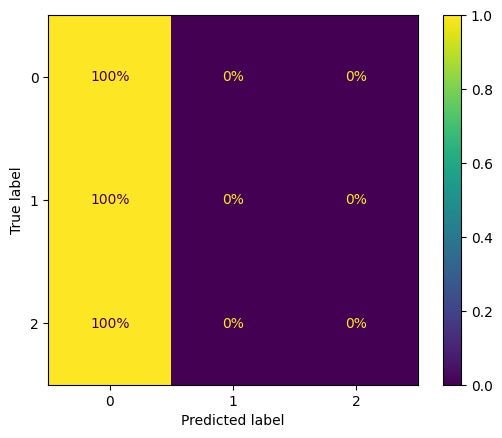

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [143]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

voting_clf_basic = VotingClassifier(estimators=[

    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC()),
    ('sgd', SGDClassifier()),
], voting='hard')

voting_clf_basic.fit(X_train, y_train)

accuracy = voting_clf_basic.score(X_test, y_test)
print(f'Voting Classifier Accuracy: {accuracy}')

C:\Users\Pepijn\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.5116279069767442


## Grid search SVC

In [144]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_accuracy = svc_clf.score(X_test, y_test)
print(f'Gradient Boosting Accuracy: {svc_accuracy}')

Gradient Boosting Accuracy: 0.5116279069767442


In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svc = {
    'C': [0.1, 100, 200, 300, 400],
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 6, 10],
    'probability': [True]
}

grid_search = GridSearchCV(SVC(), param_grid=param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svc = grid_search.best_estimator_
best_svc_accuracy = best_svc.score(X_test, y_test)
print(f'Beste Gradient Boosting Accuracy na Grid Search: {best_svc_accuracy}')

Beste Gradient Boosting Accuracy na Grid Search: 0.7023255813953488


In [146]:
best_svc

SVC(C=100, degree=1, gamma='auto', probability=True)

In [147]:
param_grid_svc = {
    'C': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    'gamma': ['auto'],
    'degree': [1, 2],
    'probability': [True]
}

grid_search = GridSearchCV(SVC(), param_grid=param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svc = grid_search.best_estimator_
best_svc_accuracy = best_svc.score(X_test, y_test)
print(f'Beste Gradient Boosting Accuracy na Grid Search: {best_svc_accuracy}')

Beste Gradient Boosting Accuracy na Grid Search: 0.7023255813953488


In [148]:
best_svc

SVC(C=50, degree=1, gamma='auto', probability=True)

In [149]:
svc = ''
if best_svc_accuracy > svc_accuracy:
    svc = best_svc
else:
    svc = svc_clf

## Grid search KNC

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knc_clf = KNeighborsClassifier()
knc_clf.fit(X_train, y_train)
knc_accuracy = knc_clf.score(X_test, y_test)
print(f'Gradient Boosting Accuracy: {knc_accuracy}')

Gradient Boosting Accuracy: 0.5279069767441861


In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knc = grid_search.best_estimator_
best_knc_accuracy = best_knc.score(X_test, y_test)
print(f'Beste Gradient Boosting Accuracy na Grid Search: {best_knc_accuracy}')

Beste Gradient Boosting Accuracy na Grid Search: 0.6302325581395349


In [152]:
best_knc

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [9, 10, 11, 12, 13, 14, 15],  
    'weights': ['distance'],  
    'metric': ['manhattan'] 
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knc = grid_search.best_estimator_
best_knc_accuracy = best_knc.score(X_test, y_test)
print(f'Beste Gradient Boosting Accuracy na Grid Search: {best_knc_accuracy}')

Beste Gradient Boosting Accuracy na Grid Search: 0.627906976744186


In [154]:
knc = ''
if best_knc_accuracy > knc_accuracy:
    knc = best_knc
else:
    knc = knc_clf

## Grid search GBM

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)
gbm_accuracy = gbm_clf.score(X_test, y_test)
print(f'Gradient Boosting Accuracy: {gbm_accuracy}')


Gradient Boosting Accuracy: 0.6325581395348837


In [156]:
gbm_accuracy = gbm_clf.score(X_test, y_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_gbm = grid_search.best_estimator_
best_gbm_accuracy = best_gbm.score(X_test, y_test)
print(f'Beste Gradient Boosting Accuracy na Grid Search: {best_gbm_accuracy}')

Beste Gradient Boosting Accuracy na Grid Search: 0.7


In [157]:
best_gbm

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200,
                           subsample=0.8)

In [158]:
gbm_accuracy = gbm_clf.score(X_test, y_test)

param_grid = {
    'n_estimators': [150, 175, 200, 225, 250],
    'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.9]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_gbm = grid_search.best_estimator_
best_gbm_accuracy = best_gbm.score(X_test, y_test)
print(f'Beste Gradient Boosting Accuracy na Grid Search: {best_gbm_accuracy}')

In [ ]:
gbm = ''
if best_gbm_accuracy > gbm_accuracy:
    gbm = best_gbm
else:
    gbm = gbm_clf

## Grid search XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_accuracy = xgb_clf.score(X_test, y_test)
print(f'XGBoost Accuracy: {xgb_accuracy}')

XGBoost Accuracy: 0.7232558139534884


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Beste model uit de Grid Search
best_xgb = grid_search.best_estimator_
best_xgb_accuracy = best_xgb.score(X_test, y_test)
print(f'Beste XGBoost Accuracy na Grid Search: {best_xgb_accuracy}')

Beste XGBoost Accuracy na Grid Search: 0.7069767441860465


In [ ]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
param_grid = {
    'n_estimators': [250, 275, 300, 325, 350, 375],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.9]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Beste model uit de Grid Search
best_xgb = grid_search.best_estimator_
best_xgb_accuracy = best_xgb.score(X_test, y_test)
print(f'Beste XGBoost Accuracy na Grid Search: {best_xgb_accuracy}')

In [ ]:
xgb = ''
if best_xgb_accuracy > xgb_accuracy:
    xgb = best_xgb
else:
    xgb = xgb_clf

## Grid search RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Standaard Random Forest Model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_accuracy = rf_clf.score(X_test, y_test)
print(f'Standaard Random Forest Accuracy: {rf_accuracy}')

Standaard Random Forest Accuracy: 0.727906976744186


In [ ]:
# Grid Search voor Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Beste model uit de Grid Search
best_rf = grid_search.best_estimator_
best_rf_accuracy = best_rf.score(X_test, y_test)
print(f'Beste Random Forest Accuracy na Grid Search: {best_rf_accuracy}')

C:\Users\Pepijn\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pepijn\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pepijn\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Pepijn\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
   

Beste Random Forest Accuracy na Grid Search: 0.7232558139534884


In [ ]:
best_rf

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=200)

In [ ]:
# Grid Search voor Random Forest
param_grid = {
    'n_estimators': [150, 175, 200, 225, 250],
    'max_depth': [40, 50, 60, 70],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf': [5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Beste model uit de Grid Search
best_rf = grid_search.best_estimator_
best_rf_accuracy = best_rf.score(X_test, y_test)
print(f'Beste Random Forest Accuracy na Grid Search: {best_rf_accuracy}')

In [ ]:
rf = ''
if best_rf_accuracy > rf_accuracy:
    rf = best_rf
else:
    rf = rf_clf

# Model opstellen

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('svc', svc),
    ('knn', knc),
    ('gbm', gbm),
    ('xgb', xgb),
    ('rf', rf)
], voting='soft')

voting_clf.fit(X_train, y_train)

accuracy = voting_clf.score(X_test, y_test)
print(f'Voting Classifier Accuracy: {accuracy}')

Voting Classifier Accuracy: 0.7372093023255814


In [ ]:
from sklearn.metrics import accuracy_score

# Evaluatie van elk model afzonderlijk
svc_accuracy = accuracy_score(y_test, svc.predict(X_test))
knn_accuracy = accuracy_score(y_test, knc.predict(X_test))
gbm_accuracy = accuracy_score(y_test, gbm_clf.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_clf.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))

print(f'SVC Accuracy: {svc_accuracy}')
print(f'KNN Accuracy: {knn_accuracy}')
print(f'GBM Accuracy: {gbm_accuracy}')
print(f'XGB Accuracy: {xgb_accuracy}')
print(f'RF Accuracy: {rf_accuracy}')

SVC Accuracy: 0.7023255813953488
KNN Accuracy: 0.6302325581395349
GBM Accuracy: 0.6325581395348837
XGB Accuracy: 0.7232558139534884
RF Accuracy: 0.727906976744186


In [ ]:
y_pred = voting_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[192,  23,   5],
       [ 25,  87,   8],
       [ 40,  12,  38]], dtype=int64)

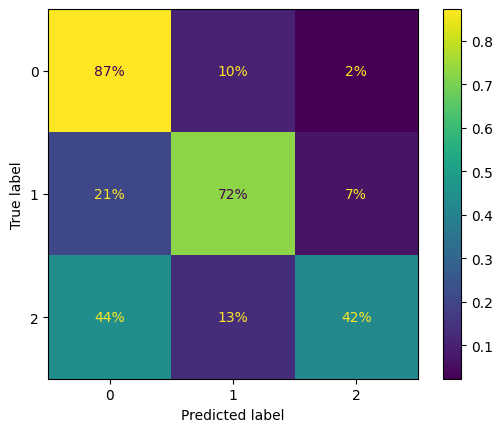

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [ ]:
import joblib

joblib.dump(voting_clf, 'wedstrijdenVoorspellen.joblib')

['wedstrijdenVoorspellen.joblib']